In [24]:
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = np.loadtxt('Originals/wpbc.data',dtype=str,delimiter=',')

In [26]:
index = ['id', 'outcome', 'recur_time', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst','tumor_size','lymph_node_status']

In [27]:
data.shape

(198, 35)

In [28]:
df = pd.DataFrame(data, columns=index)

In [29]:
df.head(5)

,id,outcome,recur_time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
0,119513,N,31,18.02,27.6,117.5,1013,0.09489,0.1036,0.1086,...,139.7,1436,0.1195,0.1926,0.314,0.117,0.2677,0.08113,5,5
1,8423,N,61,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,...,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,3,2
2,842517,N,116,21.37,17.44,137.5,1373,0.08836,0.1189,0.1255,...,159.1,1949,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,2,0
4,843584,R,27,20.29,14.34,135.1,1297,0.1003,0.1328,0.198,...,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678,3.5,0


In [30]:
df.describe()

,id,outcome,recur_time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
count,198,198,198,198,198,198,198,198,198,198,...,198,198,198,198,198,198,198,198,198,198
unique,198,2,95,177,193,181,192,179,192,196,...,183,191,172,191,197,185,192,189,39,23
top,915460,N,10,15.78,23.95,129.1,1174,0.1141,0.1267,0.2133,...,117.7,1603,0.1464,0.3583,0.3853,0.1827,0.2609,0.07863,1.5,0
freq,1,151,7,3,2,2,2,3,2,2,...,3,2,4,2,2,3,2,2,23,87


In [31]:
df[df.outcome=='N'].count()

id                         151
outcome                    151
recur_time                 151
radius_mean                151
texture_mean               151
perimeter_mean             151
area_mean                  151
smoothness_mean            151
compactness_mean           151
concavity_mean             151
concave points_mean        151
symmetry_mean              151
fractal_dimension_mean     151
radius_se                  151
texture_se                 151
perimeter_se               151
area_se                    151
smoothness_se              151
compactness_se             151
concavity_se               151
concave points_se          151
symmetry_se                151
fractal_dimension_se       151
radius_worst               151
texture_worst              151
perimeter_worst            151
area_worst                 151
smoothness_worst           151
compactness_worst          151
concavity_worst            151
concave points_worst       151
symmetry_worst             151
fractal_

In [32]:
df['lymph_node_status'] = pd.to_numeric(df['lymph_node_status'], errors='coerce')

In [33]:
df[df['lymph_node_status'].isnull()]['lymph_node_status'] = df[df['lymph_node_status'].notnull()]['lymph_node_status'].astype(np.int8).mean()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
temp = df[df['lymph_node_status'].notnull()]['lymph_node_status'].astype(np.int8).mean()

In [38]:
df[df['lymph_node_status'].isnull()].loc[:, ['outcome', 'lymph_node_status']]

,outcome,lymph_node_status
6,N,NaN
28,N,NaN
85,N,NaN
196,R,NaN


In [39]:
df.iloc[6, 34] = temp
df.iloc[28,34] = temp
df.iloc[85,34] = temp
df.iloc[196,34] = temp

In [14]:
df['lymph_node_status'].dtypes

dtype('float64')

In [15]:
df.iloc[:, 2:35] = df.iloc[:, 2:35].astype(np.float32)

In [16]:
x = df.drop(['id','outcome'], axis=1)
y = df['outcome']

In [19]:
df['radius_distance'] = (df['radius_worst']-df['radius_mean']).abs()
df['texture_distance'] = (df['texture_worst']-df['texture_mean']).abs()
df['perimeter_distance'] = (df['perimeter_worst']-df['perimeter_mean']).abs()
df['area_distance'] = (df['area_worst']-df['area_mean']).abs()
df['smoothness_distance'] = (df['smoothness_worst']-df['smoothness_mean']).abs()
df['compactness_distance'] = (df['compactness_worst']-df['compactness_mean']).abs()
df['concavity_distance'] = (df['concavity_worst']-df['concavity_mean']).abs()
df['concave points_distance'] = (df['concave points_worst']-df['concave points_mean']).abs()
df['symmetry_distance'] = (df['symmetry_worst']-df['symmetry_mean']).abs()
df['fractal_dimension_distance'] = (df['fractal_dimension_worst']-df['fractal_dimension_mean']).abs()

In [20]:
df.columns

Index(['id', 'outcome', 'recur_time', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'tumor_size', 'lymph_node_status', 'radius_distance',
       'texture_distance', 'perimeter_distance', 'area_distance',
       'smoothness_distance', 'compactness_distance', 'concavity_distance',
       'concave points_distance', 'symmetry_distance',
       'fractal_dimension_distance'],
      dtype='object')

In [21]:
x = df.drop(['id','outcome'], axis=1)
y = df['outcome']
df.to_csv('cleaned_data.csv', header=0, index=0)
x.to_csv('x.csv', header=0, index=0)
y.to_csv('y.csv', header=0, index=0)

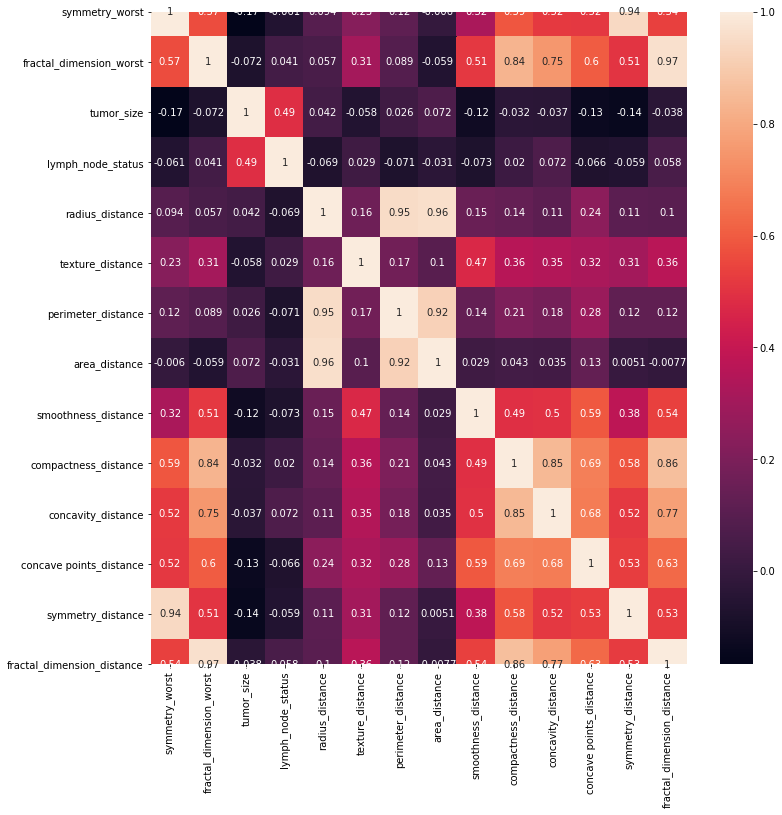

In [22]:
corr = df.iloc[:, 31:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True)

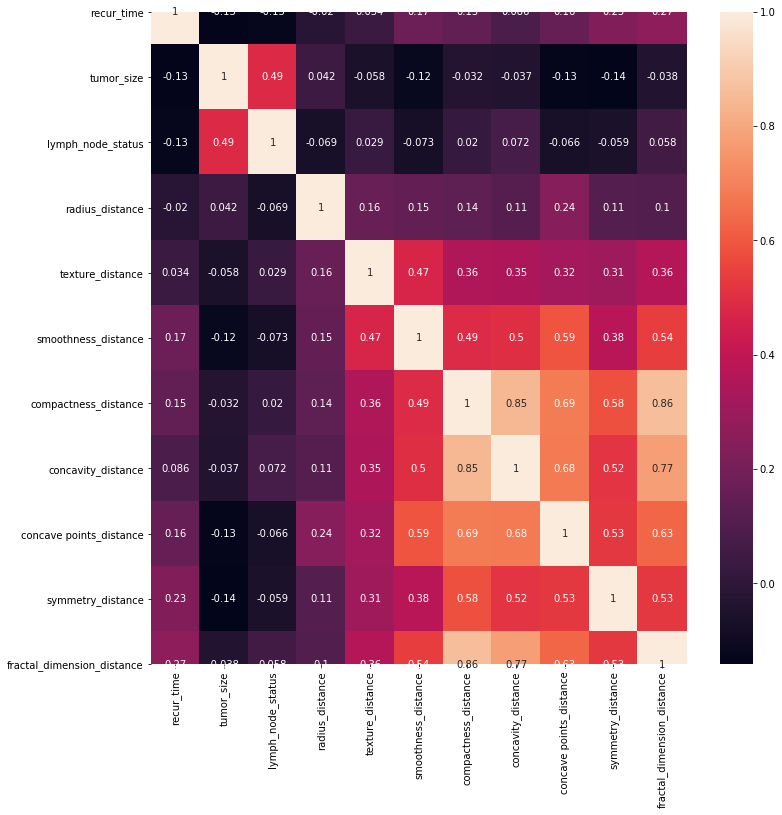

In [23]:
feature = ['recur_time', 'tumor_size', 'lymph_node_status', 'radius_distance',
        'texture_distance','smoothness_distance',
        'compactness_distance', 'concavity_distance',
        'concave points_distance', 'symmetry_distance',
        'fractal_dimension_distance']
corr = df[feature].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True)